<a href="https://colab.research.google.com/github/fdurgam/Trigonometria/blob/main/Actividad_4_Detecci%C3%B3n_de_bordes_y_reconocimiento_de_patrones_geom%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Bordes y el Reconocimiento de Patrones
La detección de bordes y el reconocimiento de patrones geométricos son técnicas fundamentales en El procesamiento de imágenes y la visión por computadora. Estas técnicas se pueden combinar con conceptos de trigonometría para mejorar la detección y análisis de formas en imágenes. A continuación, te proporciono un enfoque general sobre cómo se relacionan estos conceptos.
 Detección de Bordes

La detección de bordes es una técnica utilizada para identificar los límites de los objetos dentro de una imagen. Los bordes suelen corresponder a cambios abruptos en la intensidad de los píxeles, lo que puede indicar la presencia de una figura o contorno. Algunos de los métodos más comunes para la detección de bordes son:

**Operador de Sobel**: Este método calcula el gradiente de la imagen utilizando un filtro de convolución, que resalta los bordes en diferentes direcciones (horizontal y vertical).

**Operador de Canny**: Un enfoque más avanzado que incluye la suavización de la imagen, la detección de bordes y el supresor de no máximos.

**Detección de Bordes Basada en Gradientes**: Usa la derivada de la imagen para detectar cambios significativos en la intensidad.

**Reconocimiento de Patrones Geométricos**

El reconocimiento de patrones geométricos implica identificar formas y figuras en una imagen. Se pueden utilizar técnicas como:
*   Transformadas de Hough: Se utilizan para detectar líneas, círculos y otras formas geométricas. Por ejemplo, la Transformada de Hough para líneas busca las líneas en el espacio de parámetros.
*   Descriptores de Forma: Se utilizan para describir la geometría de un objeto, como contornos y formas.

***Ejercicio N° 1: Bordes y Reconocimiento de Patrones ***

Pasos a Seguir:

    Importar las Bibliotecas Necesarias:
        Asegúrate de tener las bibliotecas numpy, cv2 y google.colab.patches disponibles en tu entorno de Google Colab.

    Cargar una Imagen:
        Carga una imagen desde tu computadora o especifica el nombre de una imagen ya disponible en el entorno.

    Detección de Bordes:
        Convierte la imagen a escala de grises.
        Aplica el detector de bordes de Canny.
        Muestra la imagen resultante con los bordes detectados.

    Reconocimiento de Patrones Geométricos:
        Encuentra contornos en la imagen de bordes.
        Dibuja los contornos en la imagen original y muestra el resultado.

    Detección de Círculos:
        Aplica suavizado a la imagen en escala de grises.
        Utiliza la Transformada de Hough para detectar círculos en la imagen.
        Si se detectan círculos, dibújalos en la imagen original y muestra el resultado.

Bordes detectados:


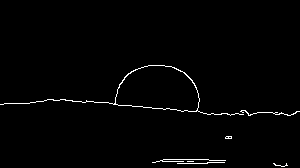

Contornos detectados:


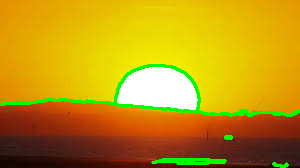

Círculos detectados:


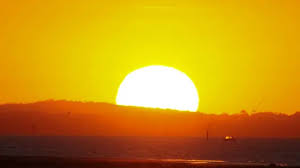

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

# Cargar una imagen de ejemplo
# Puedes subir una imagen usando files.upload()
# from google.colab import files
# uploaded = files.upload()

# Por ejemplo, si subiste una imagen llamada "imagen.jpg":
image_path = 'amanecer.jpeg'  # Cambia esto por el nombre de tu archivo si subiste uno
image = cv2.imread(image_path)

# Detección de bordes
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar el detector de bordes de Canny
edges = cv2.Canny(gray, 100, 200)

# Mostrar los bordes detectados
print("Bordes detectados:")
cv2_imshow(edges)

# Reconocimiento de patrones geométricos
# Encontrar contornos en la imagen de bordes
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen original
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con contornos
print("Contornos detectados:")
cv2_imshow(contour_image)

# Detección de Círculos (Ejemplo de Patrón Geométrico)
# Convertir a escala de grises y aplicar suavizado
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detectar círculos usando la Transformada de Hough
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Si se detectan círculos, dibujarlos
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (255, 0, 0), 4)  # Círculo azul para los bordes
        cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Centro del círculo

# Mostrar la imagen con círculos detectados
print("Círculos detectados:")
cv2_imshow(image)

**Ejercicio 2: Reconocimiento de Patrones Geométricos**

**Objetivo**: Identificar y contar patrones geométricos (círculos, triángulos, cuadrados) en una imagen.
Instrucciones:
*   Carga una imagen que contenga figuras geométricas.
*   Utiliza la Transformada de Hough para detectar círculos.
*   Encuentra contornos en la imagen y clasifica las formas geométricas (cuadrados, triángulos) basándote en el número de vértices.
*   Muestra la cantidad de cada figura detectada.

Saving pizza.jpeg to pizza.jpeg
Círculos detectados: 171
Triángulos detectados: 3
Cuadrados detectados: 16


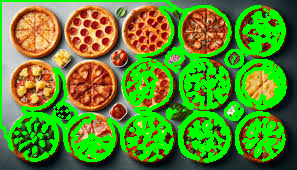

In [14]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Paso 1: Cargar una imagen de ejemplo
uploaded = files.upload()  # Sube tu imagen

# Cambia esto por el nombre de tu archivo si subiste uno
image_path = list(uploaded.keys())[0]  # Obtiene el nombre del primer archivo subido
image = cv2.imread(image_path)

# Comprobar si la imagen se ha cargado
if image is None:
    print("Error al cargar la imagen. Verifica el archivo.")
else:
    # Paso 2: Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Paso 3: Detección de Círculos
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=0, maxRadius=0)

    # Inicializar contadores
    circle_count = 0
    triangle_count = 0
    square_count = 0

    # Detección de contornos
    contours, _ = cv2.findContours(cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1],
                                   cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Paso 4: Clasificación de formas
    for contour in contours:
        # Aproximar el contorno
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 3:
            triangle_count += 1
        elif len(approx) == 4:
            square_count += 1
        else:
            if circles is not None:
                circle_count += 1  # Se cuenta como círculo si se detecta

    # Paso 5: Mostrar resultados
    print(f"Círculos detectados: {circle_count}")
    print(f"Triángulos detectados: {triangle_count}")
    print(f"Cuadrados detectados: {square_count}")

    # Mostrar la imagen original con los contornos
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
    cv2_imshow(image)
